<a href="https://colab.research.google.com/github/pushkarjain1009/Random-ML-Problems/blob/master/Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
from IPython.core.display import Image, display
display(Image("gradient_descent.png", width=1000, height=1000))

Optimization refers to the task of minimizing/maximizing an objective function f(x) parameterized by x. In machine/deep learning terminology, it’s the task of minimizing the cost/loss function J(w) parameterized by the model’s parameters w ∈ R^d. 

Optimization algorithms (in case of minimization) have one of the following goals:
* Find the global minimum of the objective function. This is feasible if the objective function is convex, i.e. any local minimum is a global minimum.
* Find the lowest possible value of the objective function within its neighborhood. That’s usually the case if the objective function is not convex as the case in most deep learning problems.
There are three kinds of optimization algorithms:
* Optimization algorithm that is not iterative and simply solves for one point.
* Optimization algorithm that is iterative in nature and converges to acceptable solution regardless of the parameters initialization such as gradient descent applied to logistic regression.
* Optimization algorithm that is iterative in nature and applied to a set of problems that have non-convex cost functions such as neural networks. Therefore, parameters’ initialization plays a critical role in speeding up convergence and achieving lower error rates.

## Gradient Descent

Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost).

Gradient descent is best used when the parameters cannot be calculated analytically (e.g. using linear algebra) and must be searched for by an optimization algorithm.

*There is a nice medium blog about the working & different versions of gradient descent algorithm https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3


### Exercise

### Define an array of 2 bit binary table

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.asarray([[0,0],
                [0,1],
                [1,0],
                [1,1]], dtype="float64")
x.shape

(4, 2)

### Define a variable y conatining the  "or" operation result of x matrix columns

In [ ]:
y = np.asarray([[0],
                [1],
                [1],
                [1]], dtype="float64")

### Define a randomly intialized weight matrix of dimension 3*1

In [ ]:
wt = np.random.uniform(low=0., high=1., size=(3,1))
wt

array([[0.4001994 ],
       [0.68384131],
       [0.27336509]])

### Define the Learning Rate

In [ ]:
learning_rate = 0.001

###  Define gradient descent function

In [ ]:
m = wt[:2]    # m be the slope
c = wt[2]     # c be the bias

cost_func_vals = []
for i in range(10):
  y_pred = np.add(np.matmul(x,m), c)
  cost_func_vals.append(0.125*sum((y_pred - y)**2))  # Here Cost Function used is Mean squared error
  m_ = np.asarray([[0], [0]], dtype="float64")       # m_ will contain the value of derivative of costfuntion with respesct to m(slope) 
  c_ = np.asarray([0], dtype="float64")              # c_ will contain the value of derivative of costfuntion with respesct to c(bias)
  for j in range(4):
    m_ += -0.5 * np.matmul(np.asarray([x[j]]).T, np.asarray([np.subtract(y_pred[j], y[j])])) 
    c_ += -0.5 * np.subtract(y_pred[j], y[j])
  m -= learning_rate * m_                            # Updated Slope
  c -= learning_rate * c_                            # Updated constant
print(m, c)

[[0.40036447]
 [0.68542778]] [0.27469251]


### Plot the Cost function

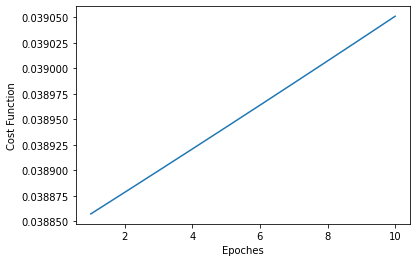

In [ ]:
plt.plot([i for i in range(1 ,11)], cost_func_vals)
plt.xlabel("Epoches")
plt.ylabel("Cost Function")
plt.show()

### plot prediction vs target

In [ ]:
#final prediction 
y_pred = np.add(np.matmul(x,m), c)
y_pred

array([[0.27469251],
       [0.96012029],
       [0.67505698],
       [1.36048476]])

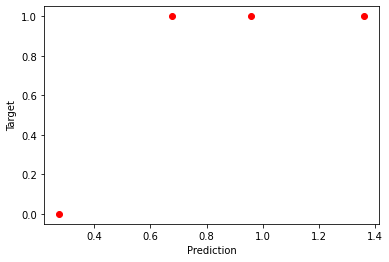

In [ ]:
plt.plot(y_pred, y, 'ro')
plt.xlabel("Prediction")
plt.ylabel("Target")
plt.show()